<a href="https://colab.research.google.com/github/smagara/LangGraph-Coursework/blob/main/langgraph_conditional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠️ LangGraph course assignment 4:
  - Implement conditional logic to route the flow of data to different nodes
  - Use START and END built-in nodes to manage entry and exit points explicitly
   - Design multiple nodes to perform different operations
   - Create a router node to handle decision-making and flow control
   - Learn to use the langgraph command:
   ``` python
    add_conditional_edges()
   ```


In [ ]:
## installs
%pip install -U langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 11.2 MB/s eta 0:00:00


In [3]:
## imports
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

In [4]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalnumber: int


In [16]:
## first node: adder
def adder(state:AgentState)->AgentState:
  """This node adds the 2 numbers"""
  state['finalnumber'] = state['number1'] + state['number2']
  return state

## second node: subtractor
def subtractor(state:AgentState)->AgentState:
    """This node subtracts the 2 numbers"""
    state['finalnumber'] = state['number1'] - state['number2']
    return state

## third node: router for next node, returns LangGraph Edge name
def decide_next_node(state:AgentState)->AgentState:
    """This node is a router that selects the next node of the LangGraph"""
    if state['operation'] == '+':
        return "addition_operation" ## return the addition_operation Edge
    elif state['operation'] == '-':
        return "subtraction_operation" ## return the subtraction_operation Edge
    else:
        return "INVALID_OPERATION"

## forth node to handle illegal operation
def invalid_operation(state:AgentState)->AgentState:
    """This node handles an illegal operation"""
    print("Invalid operation: " + state["operation"])
    return state

In [18]:
graph = StateGraph(AgentState)
graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state) ## pass through function, return the same state pass-through
graph.add_node("invalid_operation_node", invalid_operation)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node",
        "INVALID_OPERATION": "invalid_operation_node"
    }
)
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

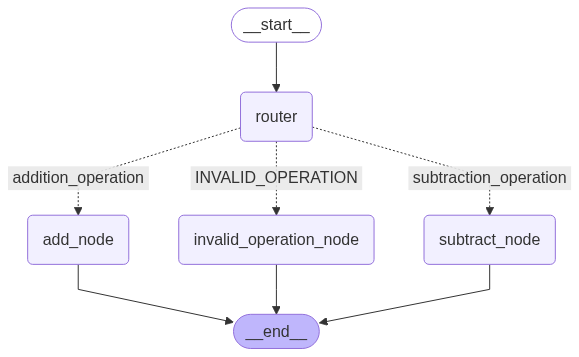

In [19]:
display(Image(app.get_graph().draw_mermaid_png()))

In [20]:
## Run Add
app.invoke({"number1":10, "number2":5, "operation":"+"})

{'number1': 10, 'operation': '+', 'number2': 5, 'finalnumber': 15}

In [21]:
## Run Subtract
app.invoke({"number1":10, "number2":5, "operation":"-"})

{'number1': 10, 'operation': '-', 'number2': 5, 'finalnumber': 5}

In [23]:
## invalid operation
app.invoke({"number1":10, "number2":5, "operation":"%"})

Invalid operation: %


{'number1': 10, 'operation': '%', 'number2': 5}